In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

In [3]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

cumulative_vaccinations = [
    1959151,
    2080280,
    2254556,
    2494371,
    2769164,
    3090058,
    3365492,
    3520056,
    3687206,
    3985579,
    4303730,
    4661293,
    5085771,
    5727693,
    5962544,
    6221850,
    6473752,
    6816945,
    7253305,
    7792996,
    8082355,
    8362868,
    8663041,
    9041835,
    9430261,
    9831897,
    10290215,
    10519729,
    10771998,
    11083652,
    ]

daily_inoculations = [100000]

for i, x in enumerate(cumulative_vaccinations):
    if len(cumulative_vaccinations) > i+1:
        daily_inoculations.append(cumulative_vaccinations[i+1] - x)

# daily_moving_average = moving_average(np.array(daily_inoculations), 7)
dataframe = pd.DataFrame({'date': pd.date_range(start='1/12/2021', end='2/10/2021'), 'daily': daily_inoculations, 'cumulative': cumulative_vaccinations})
dataframe.set_index('date', inplace=True)

# daily_moving_average = moving_average(np.array(daily_inoculations), 7)
# dataframe = pd.DataFrame({'date': pd.date_range(start='1/18/2021', end='2/9/2021'), 'daily': daily_moving_average, 'cumulative': cumulative_vaccinations[6:]})
# dataframe.set_index('date', inplace=True)

In [4]:
from datetime import datetime, timedelta

reg = LinearRegression()

x = np.array([x.timetuple().tm_yday for x in dataframe.index]).reshape(-1, 1)
y = dataframe['daily']

reg.fit(x, y)

LinearRegression()

In [5]:
import math
start = 11 + len(dataframe)
prediction_range = range(start, start + 45)
prediction_range_array = np.array(prediction_range).reshape(-1, 1)
projection = reg.predict(prediction_range_array)
projection = [x - (100000 + (math.log(x) * 350 * i)) for i, x in enumerate(projection, start=1)]
print(projection)

[287947.2559897386, 289288.9531777211, 290620.5025483414, 291942.1226749394, 293254.0238697262, 294556.4086169433, 295849.47197734413, 297133.40196627507, 298408.3799074204, 299674.58076409204, 300932.1734497745, 302181.32111948414, 303422.18144336593, 304654.90686382924, 305879.6448374109, 307096.5380624586, 308305.72469363105, 309507.3385441345, 310701.50927653897, 311888.3625829496, 313068.020355248, 314240.6008460632, 315406.2188210778, 316564.98570323497, 317717.00970936083, 318862.39597968606, 320001.24670071015, 321133.66122182144, 322259.73616605496, 323379.56553534465, 324493.2408105983, 325600.8510469051, 326702.482964159, 327798.22103336593, 328888.1475588826, 329972.34275681863, 331050.88482981804, 332123.8500384226, 333191.3127692047, 334253.34559984884, 335310.01936134405, 336361.4031974446, 337407.56462154305, 338448.56957109185, 339484.48245970247]


In [6]:
prediction_dates = [(datetime(2021, 1, 1) + timedelta(x)) for x in prediction_range]
result_df = pd.DataFrame({'date': prediction_dates, 'daily': projection})
result_df.set_index('date', inplace=True)

In [7]:
last_known = dataframe['cumulative'][-1]
# print(last_known)
projection_cumulative = []
for x in projection:
    projection_cumulative.append(last_known + x)
    last_known = last_known + x
result_df['cumulative'] = projection_cumulative
print(result_df)

                    daily    cumulative
date                                   
2021-02-11  287947.255990  1.137160e+07
2021-02-12  289288.953178  1.166089e+07
2021-02-13  290620.502548  1.195151e+07
2021-02-14  291942.122675  1.224345e+07
2021-02-15  293254.023870  1.253670e+07
2021-02-16  294556.408617  1.283126e+07
2021-02-17  295849.471977  1.312711e+07
2021-02-18  297133.401966  1.342424e+07
2021-02-19  298408.379907  1.372265e+07
2021-02-20  299674.580764  1.402233e+07
2021-02-21  300932.173450  1.432326e+07
2021-02-22  302181.321119  1.462544e+07
2021-02-23  303422.181443  1.492886e+07
2021-02-24  304654.906864  1.523352e+07
2021-02-25  305879.644837  1.553940e+07
2021-02-26  307096.538062  1.584649e+07
2021-02-27  308305.724694  1.615480e+07
2021-02-28  309507.338544  1.646431e+07
2021-03-01  310701.509277  1.677501e+07
2021-03-02  311888.362583  1.708690e+07
2021-03-03  313068.020355  1.739996e+07
2021-03-04  314240.600846  1.771421e+07
2021-03-05  315406.218821  1.802961e+07


In [10]:
complete = pd.concat([dataframe, result_df])
print(complete.head(25))


               daily  cumulative
date                            
2021-01-12  100000.0   1959151.0
2021-01-13  121129.0   2080280.0
2021-01-14  174276.0   2254556.0
2021-01-15  239815.0   2494371.0
2021-01-16  274793.0   2769164.0
2021-01-17  320894.0   3090058.0
2021-01-18  275434.0   3365492.0
2021-01-19  154564.0   3520056.0
2021-01-20  167150.0   3687206.0
2021-01-21  298373.0   3985579.0
2021-01-22  318151.0   4303730.0
2021-01-23  357563.0   4661293.0
2021-01-24  424478.0   5085771.0
2021-01-25  641922.0   5727693.0
2021-01-26  234851.0   5962544.0
2021-01-27  259306.0   6221850.0
2021-01-28  251902.0   6473752.0
2021-01-29  343193.0   6816945.0
2021-01-30  436360.0   7253305.0
2021-01-31  539691.0   7792996.0
2021-02-01  289359.0   8082355.0
2021-02-02  280513.0   8362868.0
2021-02-03  300173.0   8663041.0
2021-02-04  378794.0   9041835.0
2021-02-05  388426.0   9430261.0


<Figure size 432x288 with 0 Axes>

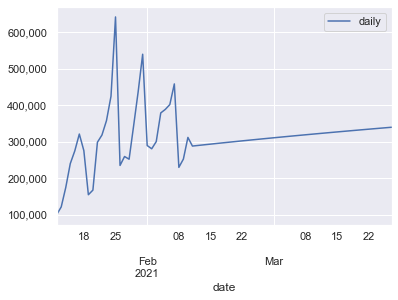

<Figure size 432x288 with 0 Axes>

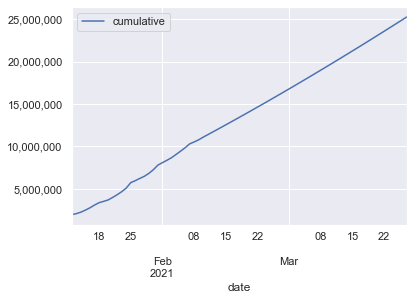

In [30]:
fig = plt.figure()
ax = complete.drop('cumulative', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

fig = plt.figure()
ax = complete.drop('daily', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

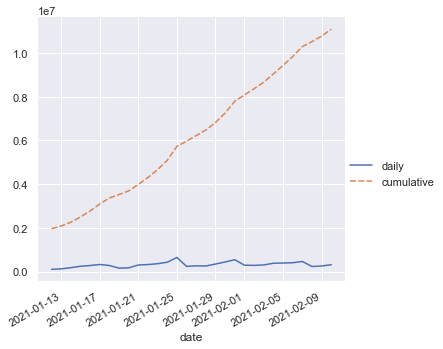

In [10]:
import seaborn as sns
sns.set_theme(style="darkgrid")
g = sns.relplot(kind="line", data=dataframe)
g.fig.autofmt_xdate()
